## Dataset

The credit of collecting and preparing the Simpsons characters dataset goes to alexattia from [Kaggle](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset).

In [0]:
# upload the simpsons dataset (the dataset you just downloaded to your local computer). I tried to automate this process using wget command and giving it the link. But had problems with Google drive links. If you come up with automate the process please let me know.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving the-simpsons-dataset.zip to the-simpsons-dataset.zip
User uploaded file "the-simpsons-dataset.zip" with length 118564451 bytes


You are unzipping the zipped dataset.

In [0]:
!unzip the-simpsons-dataset.zip >/dev/null

In [0]:
import os, shutil

base_dir = 'the-simpsons-dataset/'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')



# Directory with our training Homer pictures
train_Homer_dir = os.path.join(train_dir, 'Homer')

# Directory with our training Marge pictures
train_Marge_dir = os.path.join(train_dir, 'Marge')

# Directory with our training Lisa pictures
train_Lisa_dir = os.path.join(train_dir, 'Lisa')

# Directory with our training Bart pictures
train_Bart_dir = os.path.join(train_dir, 'Bart')



# Directory with our validation Homer pictures
validation_Homer_dir = os.path.join(validation_dir, 'Homer')

# Directory with our validation Marge pictures
validation_Marge_dir = os.path.join(validation_dir, 'Marge')

# Directory with our validation Lisa pictures
validation_Lisa_dir = os.path.join(validation_dir, 'Lisa')

# Directory with our validation Bart pictures
validation_Bart_dir = os.path.join(validation_dir, 'Bart')





# Directory with our test Homer pictures
test_Homer_dir = os.path.join(test_dir, 'Homer')

# Directory with our test Marge pictures
test_Marge_dir = os.path.join(test_dir, 'Marge')

# Directory with our test Lisa pictures
test_Lisa_dir = os.path.join(test_dir, 'Lisa')

# Directory with our test Bart pictures
test_Bart_dir = os.path.join(test_dir, 'Bart')





#Model

In [0]:
#WITHOUT DROPOUT
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


## Automating Data Input

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
print(labels_batch)

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


## Training

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 21s 213ms/step - loss: 0.5422 - acc: 0.7521 - val_loss: 0.4678 - val_acc: 0.7762
Epoch 2/30
100/100 [==============================] - 19s 188ms/step - loss: 0.4897 - acc: 0.7749 - val_loss: 0.4277 - val_acc: 0.8005
Epoch 3/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4697 - acc: 0.7776 - val_loss: 0.4056 - val_acc: 0.8085
Epoch 4/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4437 - acc: 0.7937 - val_loss: 0.3846 - val_acc: 0.8158
Epoch 5/30
100/100 [==============================] - 19s 188ms/step - loss: 0.4372 - acc: 0.7972 - val_loss: 0.3633 - val_acc: 0.8315
Epoch 6/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4195 - acc: 0.8027 - val_loss: 0.3659 - val_acc: 0.8320
Epoch 7/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4172 - acc: 0.8061 - val_loss: 0.3554 - val_acc: 0.8335
Epoch 8/30
100/100 [==============================] - 1

## Examine Performance

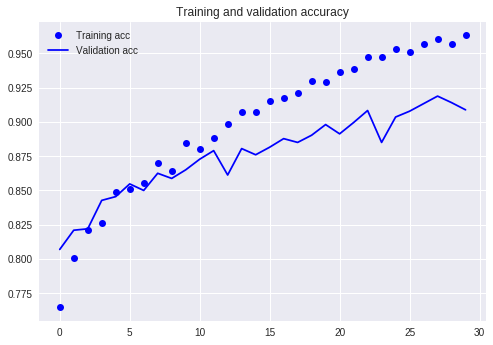

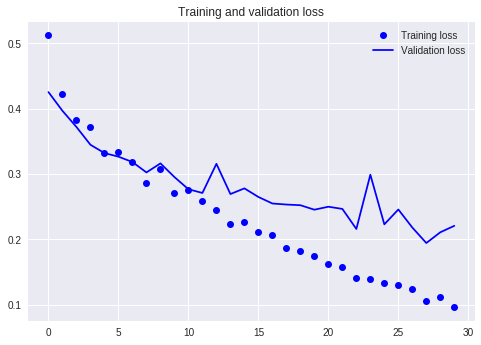

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Dropout

In [0]:
#ADDED DROPOUT
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


This is the outputs of my model when I applied dropout. It is better than before, but not perfect! We need to do more to improve the performance.

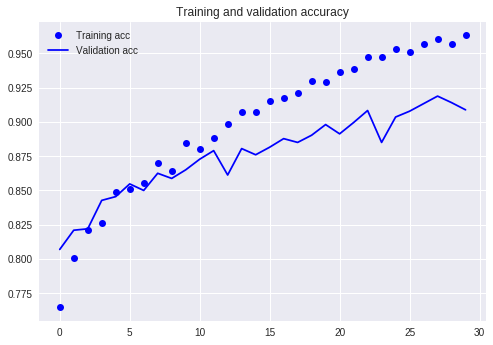

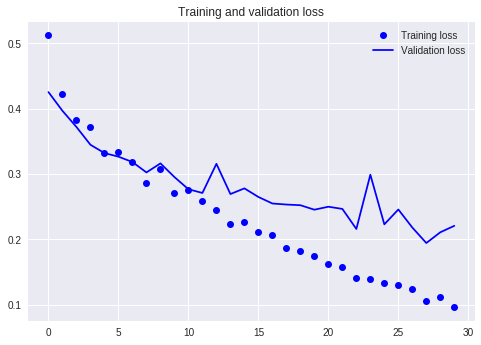

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data augmentation

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

NameError: ignored

In [0]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_Bart_dir, fname) for fname in os.listdir(train_Bart_dir)]

# We pick one image to "augment"
img_path = fnames[7]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Using TensorFlow backend.


FileNotFoundError: ignored

Rewrite your ImageDataGenerators and add augmentation to them. And train your model with this augmented data. Check the results. 

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=80,
      validation_data=validation_generator,
      validation_steps=50)

NameError: ignored

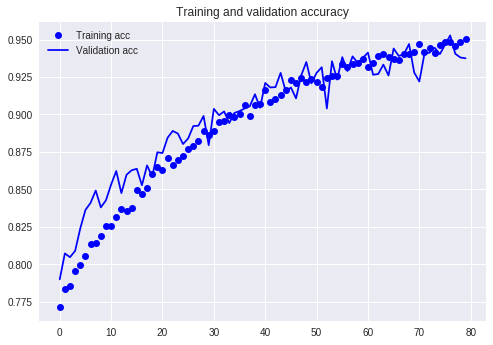

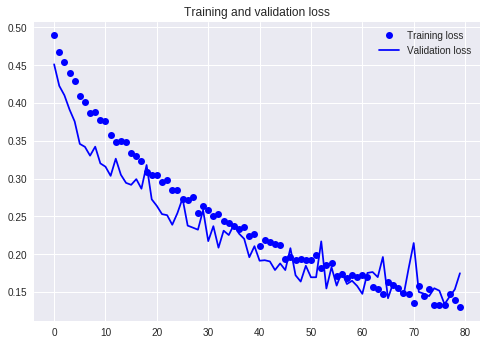

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Pretrained Model

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
import numpy as np
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=((sample_count),4))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 3000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


train_features = np.reshape(train_features, (3000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))




Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 2s 700us/step - loss: 0.4764 - acc: 0.7756 - val_loss: 0.3957 - val_acc: 0.8312
Epoch 2/30
3000/3000 [==============================] - 1s 431us/step - loss: 0.3328 - acc: 0.8692 - val_loss: 0.3087 - val_acc: 0.8797
Epoch 3/30
3000/3000 [==============================] - 1s 437us/step - loss: 0.2626 - acc: 0.9087 - val_loss: 0.2581 - val_acc: 0.9025
Epoch 4/30
3000/3000 [==============================] - 1s 435us/step - loss: 0.2227 - acc: 0.9262 - val_loss: 0.2330 - val_acc: 0.9162
Epoch 5/30
3000/3000 [==============================] - 1s 432us/step - loss: 0.1955 - acc: 0.9359 - val_loss: 0.2189 - val_acc: 0.9215
Epoch 6/30
3000/3000 [==============================] - 1s 430us/step - loss: 0.1754 - acc: 0.9448 - val_loss: 0.2054 - val_acc: 0.9252
Epoch 7/30
3000/3000 [==============================] - 1s 438us/step - loss: 0.1600 - acc: 0.9489 - val_loss: 0.1960 - val_acc: 0.9320


Plot your results. Below you see my model's performance with the original dataset (no augmented data). It is better now, but not perfect. There is some gap between training and validation accuracy.



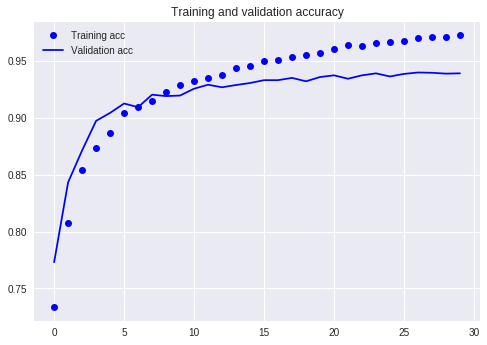

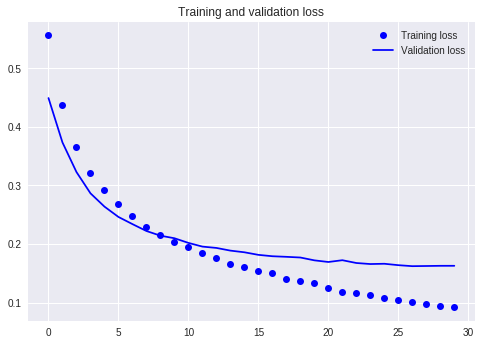

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Fine-Tuning Pre-Trained Model

In [0]:
from keras import models
from keras import layers


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
val_datagen=ImageDataGenerator(rescale=1./255)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dropout(0.6))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 32s 316ms/step - loss: 0.5419 - acc: 0.7519 - val_loss: 0.4266 - val_acc: 0.8067
Epoch 2/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4667 - acc: 0.7880 - val_loss: 0.3551 - val_acc: 0.8648
Epoch 3/30
100/100 [==============================] - 26s 261ms/step - loss: 0.4118 - acc: 0.8206 - val_loss: 0.2900 - val_acc: 0.8953
Epoch 4/30
100/100 [==============================] - 26s 262ms/step - loss: 0.3860 - acc: 0.8339 - val_loss: 0.2669 - val_acc: 0.8992
Epoch 5/30
100/100 [==============================] - 26s 263ms/step - loss: 0.3565 - acc: 0.8439 - val_loss: 0.2695 - val_acc: 0.8888
Epoch 6/30
100/100 [==============================] - 26s 263ms/step - loss: 0.3583 - acc: 0.8490 - val_loss: 0.2298 - val_acc: 0.9115
Epoch 7/30
100/100 [==============================] - 26s 262ms/

I did them all, and finally got %96.7 accurcay over the test data! I could spend a little bit more time and further improve my model and set better hyperparameters. Can you design a model that outperforms mine on the test data?

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: ignored

In [0]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=40)
print('test acc:', test_acc)

Found 800 images belonging to 4 classes.
test acc: 0.9381250023841858
